In [1]:
from bs4 import BeautifulSoup

In [2]:
import requests

In [3]:
import pandas

In [4]:
import time

In [5]:
time.sleep(1)

In [14]:
url = "https://www.greatrun.org/results/957/?page={page}"
data = []
for page in range(1, 820):
    print(page)
    data_url = url.format(page=page)
    extract = pandas.read_html(data_url)
    data.append(extract[0])

1
2
3


KeyboardInterrupt: 

In [15]:
len(data)

2

In [16]:
data

[              Name  Bib                      Club  Pos Finish Time  Gun/Chip
 0   CALLUM HAWKINS    1            Kilbarchan AAC    1    01:03:35       NaN
 1       ADAM CRAIG    2  Inverclyde Athletic Club    2    01:04:17       NaN
 2    DEREK HAWKINS    3            Kilbarchan AAC    3    01:05:32       NaN
 3   FRASER STEWART    5       Cambuslang Harriers    4    01:05:53       NaN
 4        john bell  209  Inverclyde Athletic Club    5    01:07:26       NaN
 5  robbie ferguson  288            Kilbarchan AAC    6    01:07:53       NaN
 6     ALASTAIR HAY    7    Central Athletics Club    7    01:08:40       NaN
 7        Derek Rae  202        Fife Athletic Club    8    01:09:11       NaN
 8     JOHN LENEHAN    8   Edinburgh Athletic Club    9    01:09:43       NaN
 9     Martin Brown  315           Kilmarnock H&AC   10    01:10:04       NaN,
                      Name   Bib                      Club  Pos Finish Time  \
 0      Matthew Scarsbrook   286                   Badgers   1

In [17]:
#frames = [frame[0] for frame in data]

In [18]:
#all_data = pandas.read_csv("quicksave.csv")
frames = pandas.concat(data)
frames.index = frames['Pos']
frames['Finish Time'] = frames['Finish Time'].str.split(":").apply(lambda x: int(x[0]) * 60 + int(x[1]) + int(x[2])/60)
del(frames['Pos'])

In [19]:
#all_data = pandas.concat([all_data, frames])

In [20]:
all_data = frames

In [25]:
all_data.to_csv("gsr-results-final-2022.csv")

In [21]:
import matplotlib.pyplot as plt

In [22]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mlab import GaussianKDE
import matplotlib.patheffects as pe
import numpy as np

In [23]:
np.mean(all_data['Finish Time'])

69.43333333333334

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'monospace' not found because none of the following families were found: Source Code Pro, Courier, Computer Modern Typewriter
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'monospace' not found because none of the following families were found: Source Code Pro, Courier, Computer Modern Typewriter


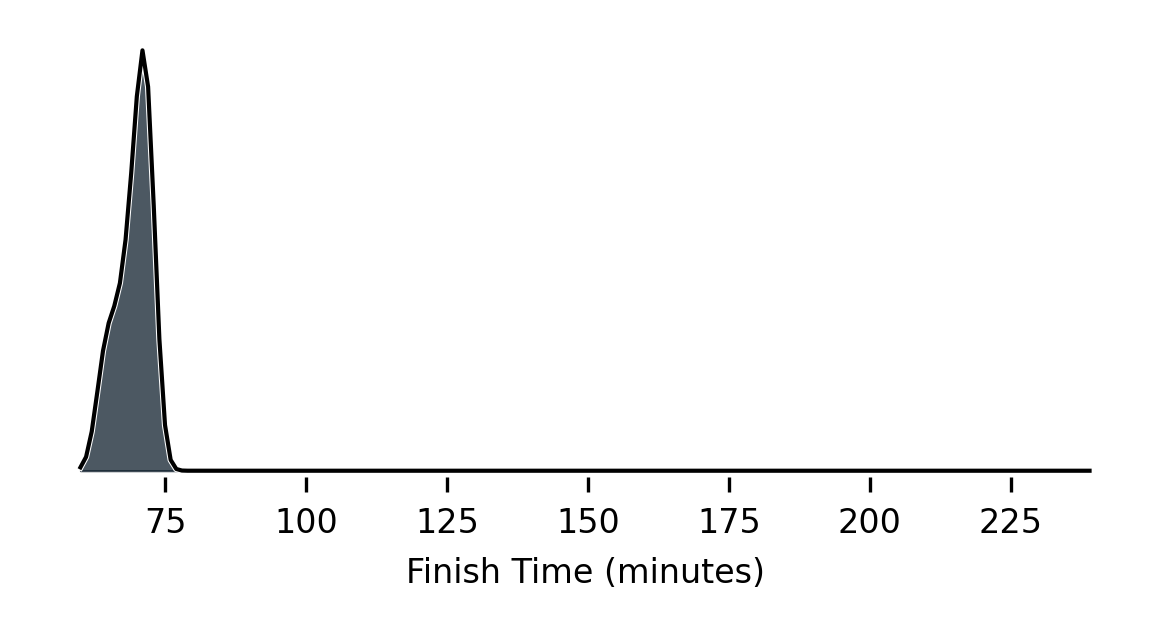

In [24]:
f, ax = plt.subplots(1,1, dpi=300, figsize=(4,2))
axis = range(60,240,1)
ax.fill_between(axis, 100*GaussianKDE(all_data['Finish Time'])(axis), alpha=0.7, color = '#00111f')
ax.plot(axis, 100*GaussianKDE(all_data['Finish Time'])(axis), color="black", linewidth=1, path_effects=[pe.Stroke(linewidth=1.5, foreground='w'), pe.Normal()])
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set(yticklabels=[])
ax.tick_params(left=False)
ax.grid(False)
f.tight_layout()

ax.set_xlabel("Finish Time (minutes)")

f.savefig("gsr-2022-finish-times.jpg")

In [175]:
np.argmax(GaussianKDE(all_data['Finish Time'])(axis))

55

In [176]:
axis[55]

115

In [150]:
ax.get_yticklabels()[0]

Text(0, 0.0, '0.0')

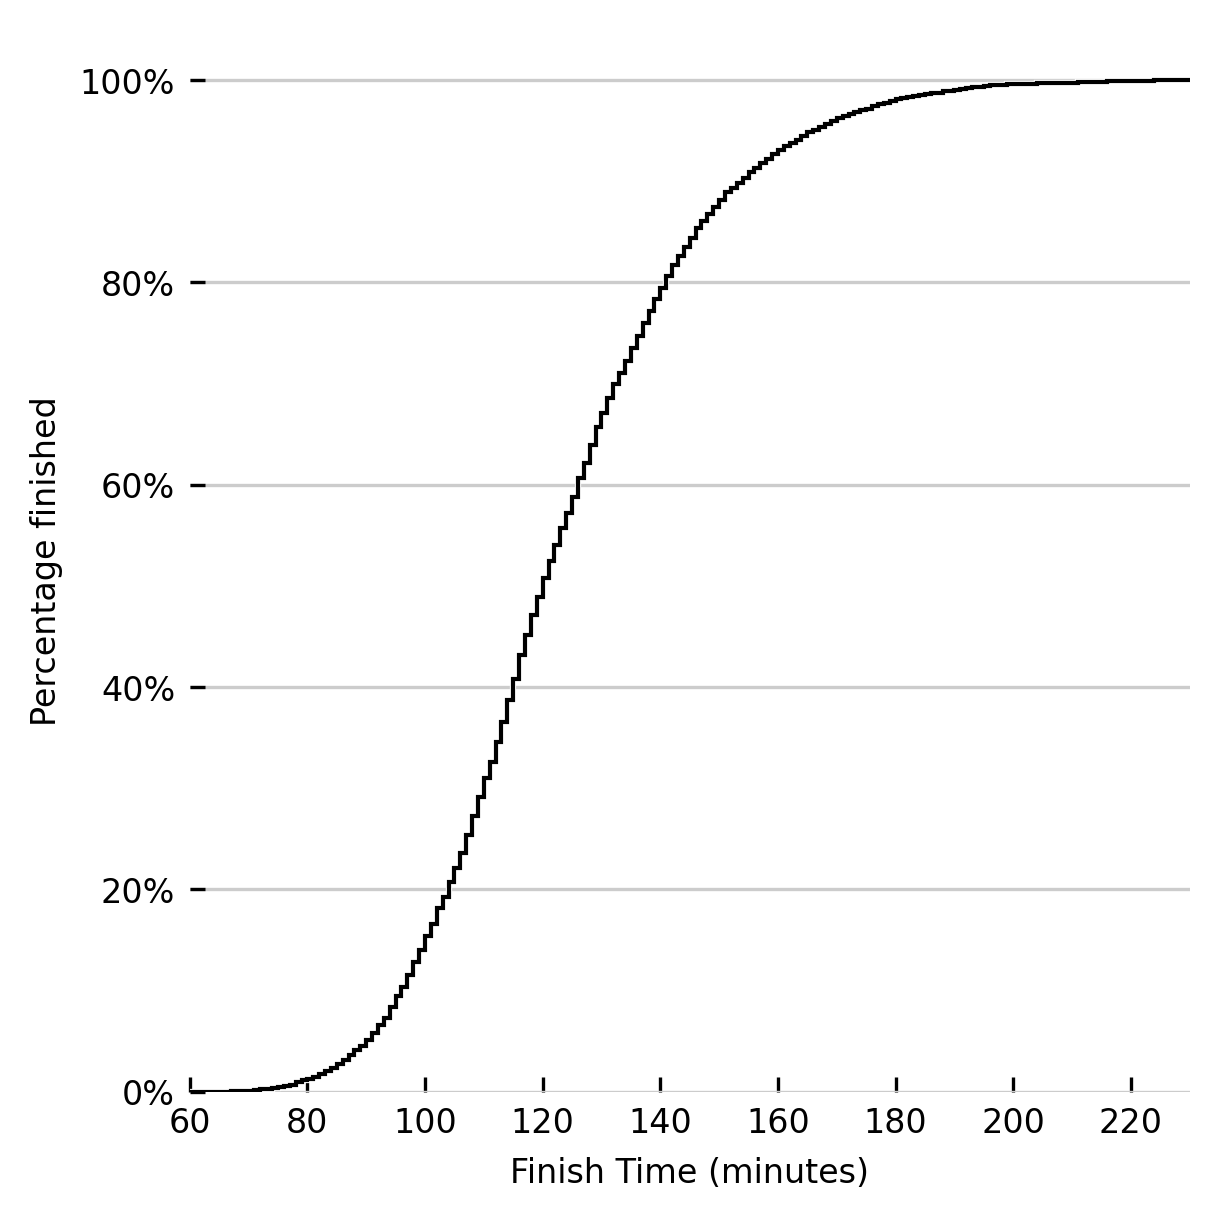

In [174]:
import matplotlib.ticker as mtick


f, ax = plt.subplots(1,1, dpi=300, figsize=(4,4))
axis = range(60,233,1)
ax.hist(all_data['Finish Time'], bins=axis, cumulative=True, density=True, histtype='step', color="black", linewidth=1, path_effects=[pe.Stroke(linewidth=1.5, foreground='w'), pe.Normal()])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.set(yticklabels=[])
#ax.tick_params(left=False)
ax.grid(which="both", axis="x")
ax.set_xlim(60, 230)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.yaxis.set_minor_formatter(mtick.PercentFormatter(xmax=1))
f.tight_layout()

ax.set_xlabel("Finish Time (minutes)")
ax.set_ylabel("Percentage finished")

f.savefig("gsr-2022-finish-cumulative.jpg")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd9be6e2110>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd9be6e26b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd9be6e1f60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd9be6e2c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd9be6e2f20>],
 'means': []}

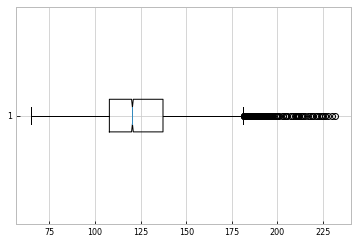

In [173]:
plt.boxplot(all_data['Finish Time'], vert=False, notch=True)

In [27]:
percentiles, times, _ = ax.hist(all_data['Finish Time'], bins=axis, cumulative=True, density=True, histtype='step', color="black", linewidth=1, path_effects=[pe.Stroke(linewidth=1.5, foreground='w'), pe.Normal()])

In [28]:
percentiles[30]

1.0000000000000002

In [161]:
times[60]

120

In [ ]:
f, ax = plt.subplots(1,1, dpi=300, figsize=(4,2))
axis = range(60,240,1)
ax.fill_between(axis, 100*GaussianKDE(all_data['Finish Time'])(axis), alpha=0.7, color = '#00111f')
ax.plot(axis, 100*GaussianKDE(all_data['Finish Time'])(axis), color="black", linewidth=1, path_effects=[pe.Stroke(linewidth=1.5, foreground='w'), pe.Normal()])
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set(yticklabels=[])
ax.tick_params(left=False)
ax.grid(False)
f.tight_layout()

ax.set_xlabel("Finish Time (minutes)")

In [177]:
all_data.to_csv("gsr-results-provisional-2023.csv")